In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### Kernel Support Vector Machine
- SVM did a very good job in the linearly separable dataset. But what happen if we have a not linearly separable dataset?
<img src="Images/7_1_Problem.JPG" height="450">
- So, we use the Kernel trick.

#### A Higher-Dimensional Space
- Mapping a non-linearly separable dataset to a higher dimension space and get a linearly separable dataset
- 1-Dimensional Space: 
<img src="Images/7_2_1D.JPG" height="450">
    - Step 1: Move everything to the left of 0 (assume that the value is 5)
    - Step 2: Square it, and we project everything to the curve
    - Step 3: We have the linearly separable dataset.
<img src="Images/7_2_1D_solution.JPG" height="450">

- 2-Dimensional space:
    - We apply some Mapping Function to a 3-D space and then we will have a new dataset which is linearly separable.
<img src="Images/7_3_2D_solution.JPG" height="450">
    - And after classification, we project it back to the 2-D space, so we have the classifier.
<img src="Images/7_3_2D_classifier.JPG" height="450">
    - As we can see, we can simplify a complex problem to a more simple problem. However, **Mapping to a Higher Dimensional Space can be highly compute-intensive**, it requires a lot of computation.
    - Therefore, this is not the best way to deal with it. 
    
#### The Kernel Trick
- **Gaussian Radial Basis Function (RBF) Kernel**:
$$K(\vec{x}, \vec{l}^i) = e^-\frac{\lVert\vec{x}-\vec{l}^i \rVert^2}{2 \sigma^2}$$
    - K: kernel: function of vector x (a point in the dataset)
    - l: landmark
<img src="Images/8_1_landmark.JPG" height="450">
- Landmark is actually in the middle of the Blue plane (x-y plane). Vertical is the result (Kernel).
- Sigma is some fix parameter
- Look at the tip, it's right in the middle of the plane, so we project to the plane, we get the landmark (red area). Taking a new point $\vec{x}$, we calculate the Eucledian distance from the landmark to the new point. The larger the distance, the the smaller exponential part (right hand side). Remember that, the maximum value of the Kernel is 1.
<img src="Images/8_2_kernel.JPG" height="450">
- Why do we need it? We will use it to separate the dataset to build the decision boundary.
- First we place the landmark in the dataset.
- Sigma will define how wide the circumference (white circle), larger sigma, larger the circuference.
<img src="Images/8_3_apply_1.JPG" height="450">
<img src="Images/8_3_apply_2.JPG" height="450">
- So the problem is to find the best sigma. 
- For more complex problem, just add multiple Kernels
<img src="Images/8_3_apply_3.JPG" height="450">

### Types of Kernel Functions
- There are multiple Kernel Functions:
<img src="Images/8_4_types_1.JPG" height="450">
For more information:

http://mlkernels.readthedocs.io/en/latest/kernels.html#kernel-composition-classes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
X = dataset.iloc[:, 2:-1].values
Y = dataset.iloc[:, -1].values

In [6]:
# Split test and training set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size=0.25,
                                                   random_state=0)

In [7]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
# Build the classifier
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')

In [14]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[64,  4],
       [ 3, 29]])

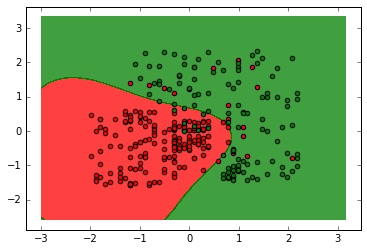

In [19]:
# Visualization training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 = X_train[:, 0]
X2 = X_train[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75,
            cmap=ListedColormap(('red', 'green')))
# Scatter points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red', 'green'))(i),
                label=j)

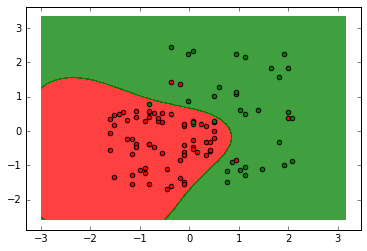

In [20]:
# Visualization test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 = X_train[:, 0]
X2 = X_train[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75,
            cmap=ListedColormap(('red', 'green')))
# Scatter points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red', 'green'))(i),
                label=j)